

#### Título: Mis primeros pasos en Redes Neuronales (Neural Networks)
#### Objetivo: Clasificación de números manuscritos MNIST

##### Autor: Dr. Gabriel Guerrero
##### Correo: saxsa2000@gmail.com
##### FechaCreacion: 20191127
##### Referencia: gg20191127_MiPrimeraRedNeuronal_ClasificacionDigitosManuscritos


##### Introducción

Este cuaderno (notebook de python) contiene el ejemplo, modificado y aumentado, del Capitulo 2, Sección 1 del libro Deep Learning with Python, del gran maestro y autor de Keras, F Chollet.

El URL del libro: 

(https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

Se los recomiendo ampliamente. Este autor además de ser un gran innovador, su transmisión de conocimientos por medio de su libro, es una obra de arte para los que nos apasionan los temas alrededor de las aplicaciones de las Matemáticas y la Ciencia de Datos.

En este ejemplo se muestra el uso de la biblioteca Keras con Python para clasificar números manuscritos (hand-written digits). Este es un ejercicio tradicional en Inteligencia Artificial y constituye el "Hola Mundo" ("Hello World"), como en todos los ambitos de la programación.





Problema: <strong>Clasificar imágenes en escala de grises (grayscale images) de dígitos manuscritos (handwritten digits).</strong>

Este es un algoritmo supervisado en donde se cuenta con una gran cantidad de ejemplos de números manuscritos que ya han sido clasificados. En base a este conocimiento, se realiza un modelo matemático de clasificación que nos permite, dado otra imagen de un número manuscrito determinar que número manuscrito representa esta imagen.

Dado una imagen, se necesita clasificarla en alguna de las 10 categorías. Es decir, determinar ¿qué número representa la imagen  (numero 0 al numero 9)? 



Un digito se ofrece como una imagen de 28 pixels x 28 pixels en escala de grises (28x28 grayscale image).


El conjunto de datos (dataset) es el conjunto Modificado del NIST (MNIST dataset) de dígitos manuscritos (MNIST database of handwritten digits).

El conjunto MNIST es un conjunto de datos "clásico" del Aprendizaje Automatizado (Machine Learning). Este conjunto ha sido utilizado ampliamente en la enseñanza.

El conjunto MNIST consta de 60,000 imágenes de entrenamiento (training images) y de 10,000 imágenes de evaluación (evaluation images).

Por medio de las imágenes de entrenamiento, se genera el modelo matemático de la red neuronal y se obtienen los parámetros o pesos del modelo.

Por medio de las imágenes de evaluación, se calcula el grado de certidumbre o precisión del modelo. Estos datos nos permiten calcular los valores que miden el rango de error y/o exactitud.

El conjunto lo ofrece el NIST (National Institute of Standards and Technology) y se encuentra disponible desde los años 1980s. Este conjunto de datos es utilizado en todos los libros y cursos introductorios de Inteligencia Artificial y es el "Hola Mundo" en esta disciplina que todos los estudiantes deben conocer.

El conjunto de datos MNIST, se encuentra pre-cargado en el sistema Keras.

El conjunto de datos MNIST se ofrece como un conjunto de cuatro arreglos de números. 

Se cuenta con conjuntos de entrenamiento ("training set"), uno para imágenes de los números manuscritos y otro de las etiquetas asociadas a los números.

Utilizando los conjuntos de entrenamiento se genera el modelo. 

De la misma forma se cuenta con conjuntos de evaluación ("evaluation set"), uno para imágenes y otro de etiquetas, a partir de los cuales se valida la certidumbre del modelo y obtiene un rango de certeza del mismo.

En resumen:

Se cuenta con un arreglo para las imágenes de entrenamiento: **train_images**

Se cuenta con un arreglo para las etiquetas de las imágenes de entrenamiento: **train_labels**

Se cuenta con un arreglo para las imágenes de evaluación: **evaluation_images**

Se cuenta con un arreglo para las etiquetas de las imágenes de evaluación: **evaluation_labels**



Para mostrar la imagenes incorporamos la biblioteca matplotlib indicando, por el parámetro **inline**, que los resultados los despliegue inmediatamente en el cuaderno jupyter



In [1]:
import matplotlib.pyplot as plt
### import numpy
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from collections import Counter
import seaborn as sns
from subprocess import check_output

%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/saXsa/anaconda3/envs

In [3]:
keras.__version__


'2.2.5'

Se carga el conjunto de datos desde keras, utilizando la función load_data() de keras

Se utiliza la biblioteca NumPy de Python para preparar los datos. La biblioteca NumPy es la herramienta básica para el cómputo científico en Python.

La biblioteca NumPy ofrece un objeto de tipo arreglo de alto desempeño mutidimensional (high-performance multidimensional array object), y una gran variedad de herramientas para manejo de este tipo objetos.

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (evaluation_images, evaluation_labels) = mnist.load_data()

Las imágenes se codifican como arreglos Numpy, y las etiquetas son un arreglo de dígitos en el rango 0 al 9.

Para cada imagen se tiene una sola etiqueta. Se tiene una correspondencia uno a uno entre las imágenes y las etiquetas.


In [5]:
train_images.dtype.name

'uint8'

In [6]:
train_labels.dtype.name

'uint8'

In [7]:
evaluation_images.dtype.name

'uint8'

In [8]:
evaluation_labels.dtype.name

'uint8'

**Análisis Exploratorio de Datos**

Analicemos el contenido de los datos de entrenamiento y de evaluación 

Analicemos la forma del conjunto de datos de entrenamiento 

El conjunto de datos leido tiene una estructura de 60,000 elementos de 28 x 28

Se crean en Python una estructura de 3 dimensiones. Tenemos una matriz de 28 x 28 para cada imagen y tenemos 60,000 imágenes.

Para analizar la estructura del conjunto se utiliza la función shape


 numpy.ma.shape(obj)

    Regresa la forma (shape) de un arreglo (Return the shape of an array).
    
    

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_images)


60000

El resultado nos indica que tenemos 60,000 imágenes de tamaño 28x28

Se muestra el primer elemento del conjunto de imagenes de entrenamiento. 

Este es una matriz de 28 x 28. 

Se indica en cada elemento de la matriz, la tonalidad de gris del pixel de la imagen, en una escala de 0 a 255.

In [11]:
train_images[0].shape

(28, 28)

In [12]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

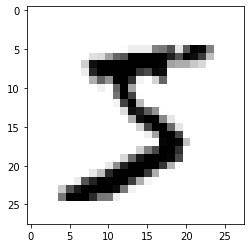

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [14]:
mi_digito = train_labels[0]
mi_digito

5

#### Muestra del conjunto de datos

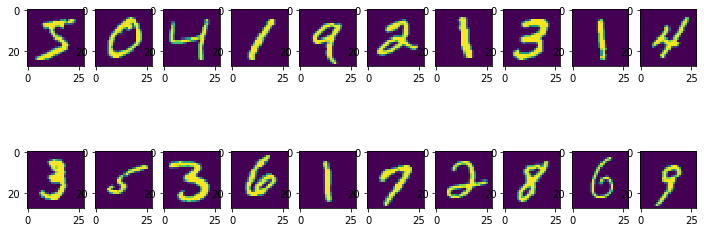

In [15]:

plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i].reshape((28,28)),interpolation='nearest')
plt.show()

**Analisis de Etiquetas**

In [16]:
train_labels.shape

(60000,)

In [17]:
len(train_labels)

60000

De la misma forma analizamos el conjunto de datos de imágenes de evaluación

In [18]:
evaluation_images.dtype.name

'uint8'

In [19]:
evaluation_images.shape

(10000, 28, 28)

In [20]:
len(evaluation_images)

10000

In [21]:
evaluation_labels.shape

(10000,)

In [22]:
len(evaluation_labels)

10000

In [23]:
FrecEtiquetasEntrenamiento = Counter(train_labels)
FrecEtiquetasEntrenamiento

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

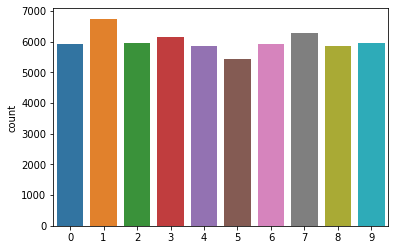

In [24]:
sns.countplot(train_labels)

In [25]:
FrecEtiquetasEvaluacion = Counter(evaluation_labels)
FrecEtiquetasEvaluacion


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

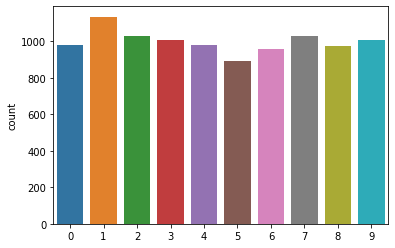

In [26]:
sns.countplot(evaluation_labels)

Este resultado nos indica que tenemos 10,000 imágenes para la evaluacion del modelo y las correspondientes 10,000 etiquetas

### Preparación de los datos de entrenamiento para datos de entrada en la red neuronal. Serialización



Los datos recibidos deben prepararse como <strong>tensores</strong> antes de enviarlos a la red neuronal

La primera parte es **"serializar"** la imagen de una matriz de 28x28, para convertirla en un vector de 784 = 28x28 entradas.

Esto se realiza por la función **reshape** de python

Convertimos el conjunto (60000, 28, 28) en una matriz (60000, 784)

Esta nueva estructura la denominamos: **train_images_serializada**


 numpy.reshape(a, newshape, order='C')

    Genera una nueva forma (shape) a un arreglo sin alterar sus datos (Gives a new shape to an array without changing its data).

In [27]:
train_images_serializada = train_images.reshape((60000, 28 * 28))


In [28]:
train_images_serializada.shape

(60000, 784)

In [29]:
train_images_serializada[0].shape

(784,)

In [30]:
train_images_serializada[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Preparación de los datos de entrenamiento para datos de entrada en la red neuronal. Normalización a valores en escala estándar

El valor que tiene cada elemento de la matriz, es un número de 0 a 255 que representa el pixel en escala de grises (tipo uint8 con valores en el intervalo de [0, 255]). Sin embargo, estos valores no son adecuados para la red neuronal que requiere que los valores de entrada se encuentren en una escala de 0 al 1

Cada imagen es una matriz de 28 x 28. Para crear una estructura unidimensional se alinea o serializa la matriz 28x28 = 784 elementos, en un vector. Esto se realiza por medio de la función python "reshape"

Enseguida cada valor se normaliza a una escala de 0 a 1, dividiendo cada valor de cada celda por 255, que es el valor maximo

El resultado obtenido es un conjunto de datos normalizado con valores entre 0 y 1

Este conjunto de datos lo denominamos **train_images_serializada_normalizada**




In [31]:
ValorMaxEscalaGrises = 255

Los valores de la matriz no están normalizados.

Por medio del siguiente enunciado convertimos cada valor a un rango (0,1)

In [32]:
train_images_serializada_normalizada = train_images_serializada.astype('float32') / ValorMaxEscalaGrises

In [33]:
train_images_serializada_normalizada[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     


***Preparación de los datos de evaluación para datos de entrada en la red neuronal. Serialización y Normalización a valores en escala estándar***


Se realiza el mismo procedimiento en las imágenes para la evaluación del modelo

In [34]:
evaluation_images_serializada = evaluation_images.reshape((10000, 28 * 28))


evaluation_images_serializada_normalizada = evaluation_images_serializada.astype('float32') / ValorMaxEscalaGrises

# Normalización de datos de etiquetas

El conjunto de datos de las etiquetas deben tambien normalizarse a **numeros** 

De la misma forma se realiza una normalización de las etiquetas.

Los valores de las etiquetas se normalizan utilizando una herramienta de keras

Para el conjunto de datos de las etiquetas, se realiza una transformación para su normalización. Esto se lleva a cabo utilizando una técnica que asocia a una etiqueta que toma valores de un catálogo de N valores diferentes, un vector de N coordenadas, en donde se indica un 1 en la celda que corresponda al valor.

Esta normalización de etiquetas se realiza por medio de una herramienta de ayuda de keras, denominada <strong>to_categorical</strong>

En el caso presente, tenemos un catálogo de 10 valores posibles (0,1,2,3,4,5,6,7,8,9)

Como ejemplo, tenemos el primer valor del conjunto como el número 5.

Dado que tenemos 10 valores, se asocia un vector de 10 posiciones y a la etiqueta se le asocia el vector

(0.,0.,0.,0.,0.,1.,0.,0.,0.,0.)


Herramienta de ayuda de keras: **to_categorical**

tf.keras.utils.to_categorical( y, num_classes=None )

La herramienta de keras <strong>to_categorical</strong> convierte una clase de vectores de enteros a una clase de matrices con solo dos valores (a class vector (integers) to binary class matrix).

Argumentos:

y: class vector que se convertirá en una matriz (enteros de 0 a num_classes).

num_classes: numero total de clases.

Regresa:

Una matriz binaria como representación de la entrada
Conversion a tensor del conjunto de datos de etiquetas

En el caso presente, la etiqueta es el número que corresponde al dígito manuscrito en la imagen

Esto NO debe pensarse como un número sino como un elemento de un catálogo que tiene 10 elementos etiqueta

Debemos convertir la etiqueta a un tensor

Esta es una técnica conocida en donde una etiqueta que toma sus valores de un catálogo, se convierte a tensor, es decir un vector de números, que además esten normalizados.

La técnica es asociar a cada elemento o valor del catálogo de N valores diferentes, un vector en el espacio N dimensional, en donde se pone un uno (1) en la celda correspondiente al número que ocupa en el catálogo

Asi en nuestro caso N=10 diferentes dígitos, con el mapeo en el catálogo, se tiene lo siguiente:

Etiqueta => NumCoordenada

0 => 1

1 => 2

...

9 => 10

Como ejemplo, si tenemos el valor etiqueta el número 5.

Dado que tenemos 10 valores, se asocia un vector de 10 posiciones y a la etiqueta se le asocia el vector

(0.,0.,0.,0.,0.,1.,0.,0.,0.,0.)



## Normalizacion de datos de etiquetas

De la misma forma se realiza una normalizacion de las etiquetas.

Este es el problema estandar de la conversion de caracteristicas de tipo categoria a un numero o vector de numeros, es decir un tensor.

Los valores de las etiquetas se normalizan utilizando una herramienta de keras


Para el conjunto de datos de las etiquetas, se realiza una transformación para su normalización. 

Esto se lleva a cabo utilizando una técnica que asocia a una etiqueta que toma valores de un catálogo de N valores diferentes, un vector de N coordenadas, en donde se indica un 1 en la celda que corresponda al valor.

Esta normalización de etiquetas se realiza por medio de una herramienta de ayuda de keras, denominada <strong>to_categorical</strong>

En el caso presente, tenemos un catálogo de 10 valores posibles (0,1,2,3,4,5,6,7,8,9)

Como ejemplo, tenemos el primer valor del conjunto como el número 5.

Dado que tenemos 10 valores, se asocia un vector de 10 posiciones y a la etiqueta se le asocia el vector

(0.,0.,0.,0.,0.,1.,0.,0.,0.,0.)

## Herramienta de ayuda de keras:  to_categorical

tf.keras.utils.to_categorical( y, num_classes=None )

La herramienta de keras <strong>to_categorical</strong> convierte una clase de vectores de enteros a una clase de matrices con solo dos valores (a class vector (integers) to binary class matrix).

Argumentos:


y: class vector que se convertirá en una matriz (enteros de 0 a num_classes).

num_classes: numero total de clases.

Regresa:

Una matriz binaria como representación de la entrada 


## Conversión a tensor del conjunto de datos de etiquetas

En el caso presente, la etiqueta es el número que corresponde al dígito manuscrito en la imagen

Esto NO debe pensarse como un número sino como un elemento de un catálogo que tiene 10 elementos etiqueta

Debemos convertir la etiqueta a un tensor

Esta es una técnica conocida en donde una etiqueta que toma sus valores de un catálogo, se convierte a tensor, es decir un vector de números, que además esten normalizados.

La técnica es asociar a cada elemento o valor del catálogo de N valores diferentes, un vector en el espacio N dimensional, en donde se pone un uno (1) en la celda correspondiente al número que ocupa en el catálogo

Asi en nuestro caso N=10 diferentes dígitos, con el mapeo en el catálogo, se tiene lo siguiente:

Etiqueta => NumCoordenada 

0 => 1

1 => 2

...

9 => 10

Como ejemplo, si tenemos el valor etiqueta el número 5.

Dado que tenemos 10 valores, se asocia un vector de 10 posiciones y a la etiqueta se le asocia el vector

(0.,0.,0.,0.,0.,1.,0.,0.,0.,0.)

Es decir, cada elemento etiqueta se convierte en un vector de 10 coordenadas

# Conversión a tensor de las etiquetas

In [35]:
from keras.utils import to_categorical

train_labels_normalizada = to_categorical(train_labels)
evaluation_labels_normalizada = to_categorical(evaluation_labels)

In [36]:
train_labels[0]

5

In [37]:
train_labels_normalizada[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
train_labels_normalizada

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [39]:
train_labels_normalizada.shape

(60000, 10)

In [40]:
evaluation_labels_normalizada.shape

(10000, 10)

In [41]:
train_images_serializada_normalizada[0].shape

(784,)

En este momento ya se cuenta con los datos de entrada de la red neuronal normalizados

**train_images_serializada_normalizada**

**train_labels_normalizada**

**evaluation_images_serializada_normalizada**

**evaluation_labels_normalizada**





# Definición Red Neuronal con keras

El concepto base de una red neuronal es la **capa** (layer).

En la construcción de una red neuronal se debe definir cada una de las capas (layer).

Una capa es un modulo de procesamiento de datos (data-processing module) que puede pensarse como un filtro que recibe datos y los transforma en otra representación que aporta valor a su entendimiento y a la solución de la problemática.

Algunos datos entran en la capa y salen otros de la capa, con una representación de mayor utilidad para la solución del problema. (Some data comes in, and comes out in a more useful form). 

El concepto del Aprendizaje Profundo es encadenar capas sencillas que instrumentan una especie de proceso progresivo de "destilación de datos" (progressive "data distillation"). 

En el caso presente, la red neuronal consiste de una secuencia de dos capas `Dense`, con función de activación "relu", Rectified Linear Unit.

Una capa tipo **Dense** tambien se conoce como **capa neuronal totalmente conectada** ("fully-connected neural layer"). Es decir, todas las neuronas de esta capa se conectan con las neuronas de la siguiente capa. 

Se define el tipo de red: **Sequential()**

Se añade cada una de las capas (layer).

La primera capa con tipo **Dense()**, número de neuronas en la capa, en el caso presente tenemos, 512 

La función de activación de la capa **activation='relu'**, y el tipo de forma de la entrada de los datos que se entregan a la red: **input_shape='784'**

La segunda capa con tipo Dense(), número de neuronas en la capa (10), la función de activación de la capa:
**activation='softmax'**

La segunda capa tiene 10 neuronas con función de activación **"softmax"**.

Esto significa que regresa un arreglo de 10 valores que representan la probabilidad que el número este en la celda. Es decir, la suma de los valores es 1. (an array of 10 probability score, summing to 1). 




#### Importación de elementos de keras para defición de la red neuronal 

In [42]:
## modelos: models
from keras import models

## capas: layers
from keras import layers

## elementos para almacenar en formato json
from keras.models import model_from_json

mi_modelo = models.Sequential()
mi_modelo.add(layers.Dense(512, activation='relu', input_shape=train_images_serializada_normalizada[0].shape ))
mi_modelo.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.







## Parametro input shape

El modelo requiere conocer la forma de los datos de entrada que recibe. Por tal razón, la primera capa de un modelo tipo Sequential necesita este parámetro.

En el caso del modelo Sequential solamente la primera capa requiere este parámetro, dado que las siguientes capas infieren de forma automática la forma de los valores que reciben de la capa anterior. 

En nuestro caso la forma es:

train_images_serializada_normalizada[0].shape

Esta tiene un valor de 784

In [43]:
train_images_serializada_normalizada[0].shape

(784,)

Para iniciar el modelo, keras asigna de forma aleatoria un valor a todos los "pesos" 

Tenemos 784 valores que deben darse a cada una de las 512 neuronas de inicio

Es decir, tendremos una matriz de 784 x 512 

En total tenemos 784 x 512 = 401,408 valores de los pesos de inicio de la red

Al salir de la primera capa, cada una de las 512 neuronas saca un resultado

Asi tenemos a la salida de la primera capa un total de 401,920 valores

( 784 x 512 ) + 512 = 401,408 + 512 =  401,920

In [44]:
weight_origin=mi_modelo.layers[0].get_weights()[0]

In [45]:
weight_origin.shape

(784, 512)

In [46]:
weight_origin

array([[-0.06299968, -0.04182801, -0.06262244, ..., -0.04804396,
        -0.02315671,  0.06025483],
       [ 0.02204821, -0.00958952,  0.04111206, ...,  0.04233022,
         0.06562877, -0.00214054],
       [-0.04587858,  0.01275635,  0.01111619, ...,  0.051656  ,
         0.06363802, -0.0100935 ],
       ...,
       [-0.00221618,  0.01616518, -0.03948038, ..., -0.02039685,
        -0.0223934 , -0.02019854],
       [ 0.01719376,  0.00613079,  0.02928239, ..., -0.03711984,
         0.06508781,  0.04903734],
       [ 0.01968163,  0.00888403, -0.05616226, ..., -0.03994714,
         0.05227633, -0.00393517]], dtype=float32)

# Resumen de la representación del modelo 

En keras se cuenta con una funcion que nos describe el modelo de la red neuronal indicando todas las capas y los "pesos" o parámetros que calcula

mi_modelo.summary() despliega un resumen de la representación del modelo 

In [47]:
mi_modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


El numero de parametros (Total params) es:  407,050 

Este se calcula de la siguiente forma:
Cada una de las 512 nueronas de inicio, recibe un vector de 784 coordenadas

784 x 512 = 401,408

512 + 401,408 = 401,920

Cada una de las 10 neuronas de la segunda capa, recibe 512 parametros de la capa anterior

En esta etapa tenemos 5120 valores

10 x 512 = 5120

A la salida de la segunda capa tenemos un vector de 10 valores, que representan la probabilidad 

Esta capa contribuye con 5130 valores

10 + 5120 = 5130

Al final tenemos un total de 407,050 valores

401,920 + 5130 = 407,050

## Compilación de la Red Neuronal

Una vez definida la red, se debe compilar para su ejecución

Se deben definir los parámetros de la compilación:

**función de pérdida (loss function)**

**método de optimización (optimizer)**

**métrica (Metrics)**

Una función de pérdida (loss), nos indica cómo la red neuronal mide el avance en cada iteración (epoch)

Se cuenta con varios tipos de función de pérdida como:

mean_squared_error

mean_absolute_error

mean_absolute_percentage_error

mean_squared_logarithmic_error

squared_hinge

hinge

categorical_hinge

logcosh= logaritmo del coseno hiperbolico de la prediccion de error (Logarithm of the hyperbolic cosine of the prediction error)

categorical_crossentropy

sparse_categorical_crossentropy

binary_crossentropy

kullback_leibler_divergence

poisson

cosine_proximity



Nota: Cuando usamos categorical_crossentropy loss, los objetivos deben estar en formato categórico (por ejemplo, si tiene 10 clases, el objetivo para cada muestra debe ser un vector de 10 dimensiones que sea todo ceros excepto un 1 en el índice correspondiente a la clase de la muestra). Para convertir objetivos enteros en objetivos categóricos, puede usar la Keras utility **to_categorical**



## Función de optimización "optimizador" (optimizer) 

optimizer: String (name of optimizer) or optimizer instance. Un método o función de optimización (optimizer). Este es el método o mecanismo por medio del cual se lleva a cabo la optimización de la función de pérdida (loss function). 

Existe una gran diversidad:

sdg=Gradiente estocástico de descenso (Stochastic gradient descent)

RMSProp

Adagrad

Adadelta

Adam

Adamax 

Nadam=Nesterov Adam

TFOptimizer=Clase Wrapper para optimizadores nativos TensorFlow



## Métrica (metrics)

métricas: Lista de métricas que evaluará el modelo durante la capacitación y las pruebas. Normalmente, se utilizan
metrics=['accuracy']. Para especificar diferentes métricas para diferentes salidas de un modelo de múltiples salidas, también podría pasar un diccionario, como metrics={'output_a': 'accuracy'}

Una metrica (metrics) monitorea o mide el desempeño en la etapa de construccion del modelo (training) y de evaluacion del modelo (evaluation). 

En el caso presente nos enfocamos a la precisión (accuracy), es decir el porcentaje de imagenes que fueron correctamente clasificadas  (the fraction of the images that were correctly classified).

Medir el desempeño del modelo (performance of the model). 


Una función de  métrica es similar a la función de pérdida, excepto que el resultado no se utiliza en el entrenamiento del modelo, solo en la evaluación

Se cuenta con diversas métricas existentes en keras. Se puede también indicar el nombre simbólico de una métrica en Theano/TensorFlow 

binary_accuracy

categorical_accuracy

sparse_categorical_accuracy

top_k_categorical_accuracy

sparse_top_k_categorical_accuracy



In [48]:
mi_modelo.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Función de optimización "optimizador" (optimizer)

En el caso presente, se utiliza el optimizador <strong>adam</strong>

Adam: Un método para la optimización estocástica Diederik Kingma, Jimmy Ba

Referencia bibliográfica: https://arxiv.org/abs/1412.6980v8

Publicado como documento de conferencia en la 3ra Conferencia Internacional para Representaciones de Aprendizaje, San Diego, 2015.

**Adam**, es un algoritmo para la optimización basada en gradientes de primer orden de funciones objetivas estocásticas, basado en estimaciones adaptativas de momentos de orden inferior.

El método es sencillo de implementar, es computacionalmente eficiente, tiene pocos requisitos de memoria, es invariante al reescalado diagonal de los gradientes y es adecuado para problemas grandes en términos de datos y / o parámetros.

El método también es apropiado para objetivos no estacionarios y problemas con gradientes muy ruidosos y / o dispersos.

Los hiper-parámetros tienen interpretaciones intuitivas y típicamente requieren poco ajuste.

Los resultados empíricos demuestran que Adam funciona bien en la práctica y se compara favorablemente con otros métodos de optimización estocástica.


# Utilización del modelo para la clasificación de imágenes

Una vez definida la red, ya estamos listos para entrenar nuestra red, es decir obtener los parametros del modelo.

En Keras esto se realiza a través de una llamada al método `fit`.

fit

Entrena el modelo con un numero fijo de epocas (epochs).

fit

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

Trains the model for a given number of epochs (iterations on a dataset).



## epochs

Una época (epochs) es una iteración completa con un conjunto de datos.

Número de épocas para entrenar el modelo.

Tenga en cuenta que, junto con initial_epoch, las épocas deben entenderse como "época final".

El modelo no está entrenado para una serie de iteraciones dadas por épocas, sino simplemente hasta que se alcanza la época de las épocas de índice.


## batch_size

Un tamaño de datos de entrada del lote de entrenamiento (batch_size) 	

batch_size: Integer or None. Número de muestras por actualización de gradiente. Si no se especifica, batch_size will default to 32.

El parametro (batch_size) es un entero o NULL (Integer or NULL). 
Este es un numero de ejemplos que se utilizan en actualizar el gradiente (samples per gradient update). 
Por omison, cuando no se especifica un tamaño del lote, se toma un valor de 32.

Keras utiliza bibliotecas matemáticas simbólicas rápidas como backend, como TensorFlow y Theano.

Una desventaja de usar estas bibliotecas es que la forma y el tamaño de sus datos deben definirse una vez por adelantado y mantenerse constantes, independientemente de si está entrenando su red o haciendo predicciones.

En los problemas de predicción de secuencia, puede ser conveniente usar un tamaño de lote grande cuando se entrena en la red y un tamaño de lote de 1 al hacer predicciones para predecir el siguiente paso en la secuencia.

Un beneficio de usar Keras es que está construido sobre bibliotecas matemáticas simbólicas como TensorFlow y Theano para un cálculo rápido y eficiente. Esto es necesario con grandes redes neuronales.

Una desventaja de usar estas bibliotecas eficientes es que debe definir el alcance de sus datos por adelantado y para siempre. En concreto, el tamaño del lote.

El tamaño del lote limita el número de muestras que se mostrarán a la red antes de que se pueda realizar una actualización de peso. Esta misma limitación se impone cuando se hacen predicciones con el modelo de ajuste.

Específicamente, el tamaño del lote utilizado al ajustar su modelo controla la cantidad de predicciones que debe realizar a la vez.

A menudo, esto no es un problema cuando desea hacer las mismas predicciones de números a la vez que el tamaño del lote utilizado durante el entrenamiento.

Esto se convierte en un problema cuando desea hacer menos predicciones que el tamaño del lote. Por ejemplo, puede obtener los mejores resultados con un tamaño de lote grande, pero se requiere que haga predicciones para una observación a la vez en algo como una serie de tiempo o un problema de secuencia.

Esta es la razón por la cual puede ser conveniente tener un tamaño de lote diferente al ajustar la red a los datos de entrenamiento que al hacer predicciones sobre datos de prueba o nuevos datos de entrada.



fit

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

Trains the model for a given number of epochs (iterations on a dataset).


evaluation_images_serializada_normalizada , evaluation_labels_normalizada

In [49]:
historico = mi_modelo.fit(train_images_serializada_normalizada, train_labels_normalizada,  validation_data=(evaluation_images_serializada_normalizada , evaluation_labels_normalizada) , epochs=3, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 312us/step - loss: 0.2718 - acc: 0.9237 - val_loss: 0.1304 - val_acc: 0.9621
Epoch 2/3
60000/60000 [==============================] - 17s 291us/step - loss: 0.1085 - acc: 0.9685 - val_loss: 0.0904 - val_acc: 0.9711
Epoch 3/3
60000/60000 [==============================] - 18s 296us/step - loss: 0.0705 - acc: 0.9794 - val_loss: 0.0704 - val_acc: 0.9782


En todo desarrollo es muy importante poder analizar el desempeño del modelo durante toda la etapa de generacion. (You can learn a lot about neural networks and deep learning models by observing their performance over time during training.)

Keras es una poderosa biblioteca Python que ofrece una interfaz para la creacion de modelos de Aprendizaje Profundo y engloba en una capa de alto nivel los aspectos detallados de TensorFlow. (Keras is useful for creating deep learning models and wraps the more technical TensorFlow backend.)

Con la herramienta history en keras se puede analizar y visualizar el desempeño de modelos de Deep Learning en Keras (you can review and visualize the performance of deep learning models over time during the training).

In [50]:
history_dict = historico.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks that is registered when training all deep learning models is the History callback. 

It records training metrics for each epoch. 

This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. 

Metrics are stored in a dictionary in the history member of the object returned.

For example, you can list the metrics collected in a history object 


History

keras.callbacks.History()

Callback that records events into a History object.

This callback is automatically applied to every Keras model. The History object gets returned by the fit method of models.

In [51]:
# list all data in history
print(historico.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


We can use the data collected in the history object to create plots.

The plots can provide an indication of useful things about the training of the model, such as:

    It’s speed of convergence over epochs (slope).
    Whether the model may have already converged (plateau of the line).
    Whether the mode may be over-learning the training data (inflection for validation line).



### Visualizar el  desempeño (precisión y pérdida) por época Modelo con herramienta History de Keras

Se puede generar una grafica que muestra la precisión en el entrenamiento (acc) y en la evaluacion (val_acc)



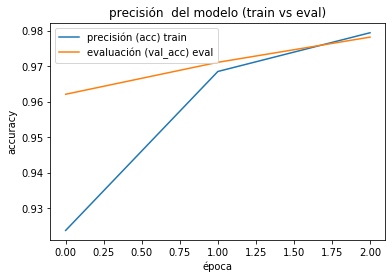

In [52]:
# grafica precision entrenamiento VS evaluacion
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('precisión  del modelo (train vs eval)')
plt.ylabel('accuracy')
plt.xlabel('época')
plt.legend(['precisión (acc) train', 'evaluación (val_acc) eval'], loc='upper left')
plt.show()

Se puede generar una grafica que muestra el error o pérdida en el entrenamiento (loss) y en la evaluacion (val_loss)


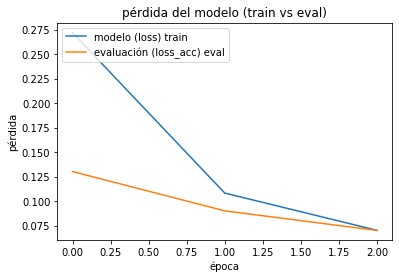

In [53]:
# grafica precision entrenamiento VS evaluacion
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('pérdida del modelo (train vs eval)')
plt.ylabel('pérdida')
plt.xlabel('época')
plt.legend(['modelo (loss) train', 'evaluación (loss_acc) eval'], loc='upper left')
plt.show()

En la etapa de entrenamiento realizada por medio de dos cantidades durante el entrenamiento: la "pérdida" de la red sobre los datos de entrenamiento y la precisión de la red sobre los datos de entrenamiento.

Rápidamente alcanzamos una precisión de 0.989 (es decir, 98.9%) en los datos de entrenamiento. Ahora comprobemos que nuestro modelo también funciona bien en el conjunto de prueba:

model.to_json() returns a representation of the model as a JSON string. 

Note that the representation does not include the weights, only the architecture.

In [54]:
from keras.models import model_from_json

json_string = mi_modelo.to_json()

json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null

Keras es una biblioteca de Python simple y poderosa para el aprendizaje profundo.

Dado que los modelos de aprendizaje profundo pueden tomar horas, días e incluso semanas para entrenarse, es importante saber cómo guardarlos y cargarlos desde el disco.

Keras separa las preocupaciones de guardar la arquitectura de su modelo y guardar los pesos de su modelo.

Los pesos de los modelos se guardan en formato HDF5. Este es un formato de cuadrícula que es ideal para almacenar matrices de números multidimensionales.

La estructura del modelo se puede describir y guardar utilizando dos formatos diferentes: JSON y YAML.

JSON es un formato de archivo simple para describir datos jerárquicamente.

Keras proporciona la capacidad de describir cualquier modelo utilizando el formato JSON con una función to_json (). Esto se puede guardar en un archivo y luego cargarse a través de la función model_from_json () que creará un nuevo modelo a partir de la especificación JSON.

Los pesos se guardan directamente del modelo usando la función save_weights () y luego se cargan usando la función simétrica load_weights ().



In [55]:
from datetime import datetime
# current date and time
now = datetime.now()
now

datetime.datetime(2019, 11, 27, 22, 46, 22, 595141)

In [56]:
ahorita = now.strftime("%Y%m%d%H%M%S")
ahorita

'20191127224622'

In [57]:
MiArchivoJSON = 'ggCapLibro2_1_MiPrimeraRedNeuronal_' + ahorita + '.json'
MiArchivoJSON

'ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.json'

In [58]:
MiArchivoPesosH5 = 'ggCapLibro2_1_MiPrimeraRedNeuronal_' + ahorita + '.h5'
MiArchivoPesosH5

'ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.h5'

In [59]:
with open(MiArchivoJSON, "w") as json_file:
    json_file.write(json_string)

print("Almacenado del modelo JSON a disco ")

!ls -l 


Almacenado del modelo JSON a disco 
total 240
-rw-r--r-- 1 saXsa saXsa 136381 nov 27 22:44 gg20191127_MiPrimeraRedNeuronal_ClasificacionDigitosManuscritos.ipynb
-rw-rw-r-- 1 saXsa saXsa   1137 nov 27 22:46 ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.json
-rw-rw-rw- 6 saXsa saXsa  83606 nov  8 19:10 jquery.min.js
-rw-rw-rw- 6 saXsa saXsa  15209 nov  8 19:09 require.min.js


Si deseamos almacenar los pesos del modelo (weights of a model) en formato HDF5, tenemos la funcion keras 



In [60]:
# serialize weights to HDF5
mi_modelo.save_weights(MiArchivoPesosH5)
print("Almacenado de los pesos a disco ")

!ls -l 

Almacenado de los pesos a disco 
total 1896
-rw-r--r-- 1 saXsa saXsa  189680 nov 27 22:46 gg20191127_MiPrimeraRedNeuronal_ClasificacionDigitosManuscritos.ipynb
-rw-rw-r-- 1 saXsa saXsa 1640488 nov 27 22:46 ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.h5
-rw-rw-r-- 1 saXsa saXsa    1137 nov 27 22:46 ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.json
-rw-rw-rw- 6 saXsa saXsa   83606 nov  8 19:10 jquery.min.js
-rw-rw-rw- 6 saXsa saXsa   15209 nov  8 19:09 require.min.js


In [61]:
print(check_output(["ls", "."]).decode("utf8"))

gg20191127_MiPrimeraRedNeuronal_ClasificacionDigitosManuscritos.ipynb
ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.h5
ggCapLibro2_1_MiPrimeraRedNeuronal_20191127224622.json
jquery.min.js
require.min.js



### Uso del modelo y pesos para realizar predicciones en datos nuevos

Once you choose and fit a final deep learning model in Keras, you can use it to make predictions on new data instances.


Classification problems are those where the model learns a mapping between input features and an output feature that is a label, such as “spam” and “not spam“.

We can predict the class for new data instances using our finalized classification model in Keras using the predict_classes() function. Note that this function is only available on Sequential models, not those models developed using the functional API.

For example, we have one or more data instances in an array called Xnew. This can be passed to the predict_classes() function on our model in order to predict the class values for each instance in the array.

predict

predict(self, x, batch_size=32, verbose=0)

Generates output predictions for the input samples, processing the samples in a batched way.

Arguments

    x: the input data, as a Numpy array.
    batch_size: integer.
    verbose: verbosity mode, 0 or 1.

Returns

A Numpy array of predictions.

predict_classes

predict_classes(self, x, batch_size=32, verbose=1)

Generate class predictions for the input samples batch by batch.

Arguments

    x: input data, as a Numpy array or list of Numpy arrays (if the model has multiple inputs).
    batch_size: integer.
    verbose: verbosity mode, 0 or 1.



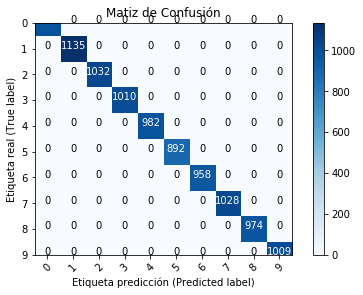

In [63]:
# La matriz de confusión
# 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matiz de Confusión',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta real (True label)')
    plt.xlabel('Etiqueta predicción (Predicted label)')

    
    
### evaluation_images_serializada_normalizada , evaluation_labels_normalizada
    
# Predict the values from the validation dataset
Y_pred = mi_modelo.predict(train_images_serializada_normalizada)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax( evaluation_labels_normalizada, axis = 1) 


# Convert validation observations to one hot vectors
Y_true = np.argmax( evaluation_labels_normalizada, axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))